<a href="https://colab.research.google.com/github/kartikgill/The-GAN-Book/blob/main/Skill-05/Latent-Space-Exploration/Human-face-latent-code-experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Useful Libraries

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [ ]:
import tensorflow
print (tensorflow.__version__)

2.3.0


# Loading Saved Generator Model for Celeb Faces

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
generator_network = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/GAN_datasets/celeb_model_new')

# Utility function to generate Noise batch (Latent vectors)

In [ ]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

# Generating Results with the pre-trained generator model

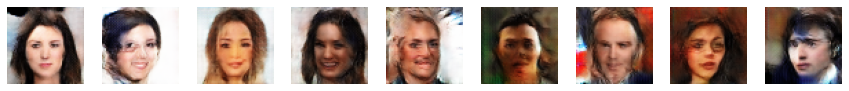

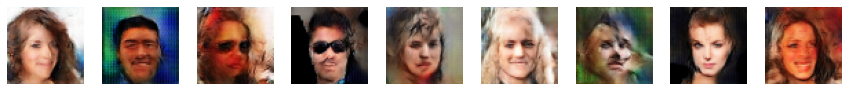

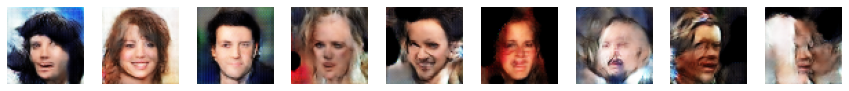

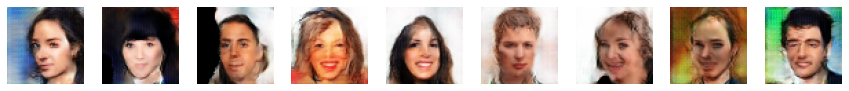

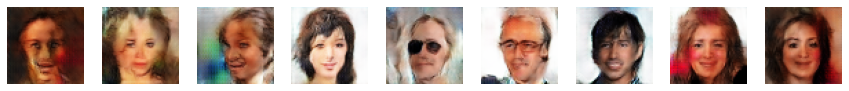

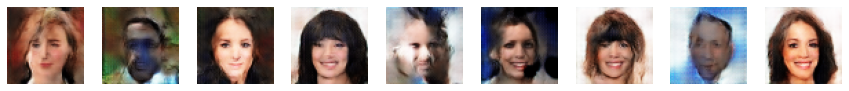

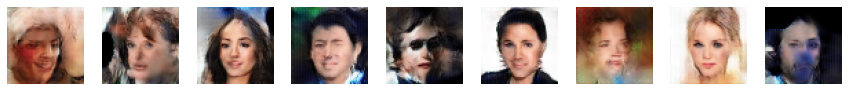

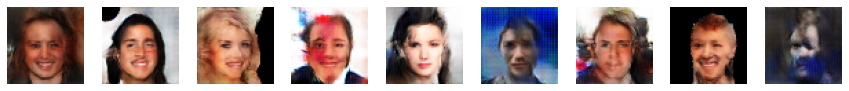

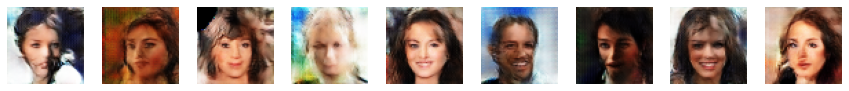

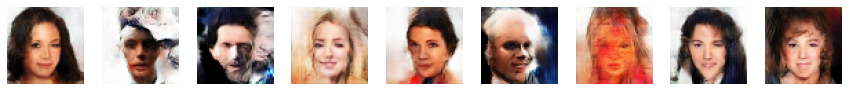

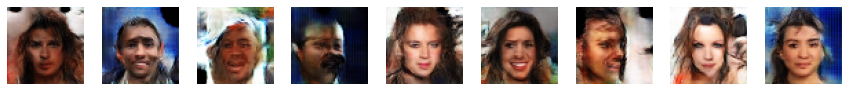

In [ ]:
noise_size = 100
random_noise_batches = get_random_noise(100, noise_size)
fake_samples = generator_network.predict_on_batch(random_noise_batches)

fake_samples = (fake_samples+1.0)/2.0
counter = 0
for k in range(11):
    plt.figure(figsize=(15, 15))
    for j in range(9):
        plt.subplot(990 + 1 + j)
        plt.imshow(fake_samples[counter])
        counter += 1
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

# Picking up few images with same hair colors to study latent space

In [ ]:
black_hair_women = [0, 1, 3, 27, 28, 31, 48, 67, 76, 81, 88]
golden_hair_women = [2, 14, 61, 65, 75, 84]

# Getting average latent codes for given particular hair colors

In [ ]:
black_hair_avg_latent_code = np.mean(random_noise_batches[np.array(black_hair_women),:], axis=0)
golden_hair_avg_latent_code = np.mean(random_noise_batches[np.array(golden_hair_women),:], axis=0)

# Average code must represent the same color of hair

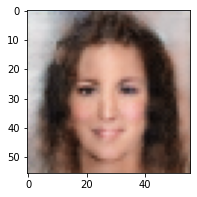

In [ ]:
fake_sample = generator_network.predict(np.array([black_hair_avg_latent_code]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

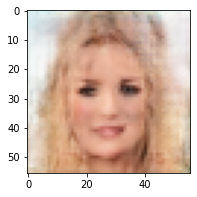

In [ ]:
fake_sample = generator_network.predict(np.array([golden_hair_avg_latent_code]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

# how about mixing hair colors

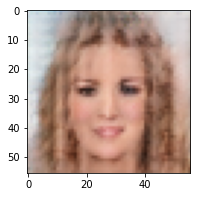

In [ ]:
# Mixture
black_golden_avg = (black_hair_avg_latent_code + golden_hair_avg_latent_code)/2.0

fake_sample = generator_network.predict(np.array([black_golden_avg]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(3,3))
plt.imshow(fake_sample)
plt.show()

In [ ]:
random_noise_batches.shape

(100, 100)

# Small corruptions in latent vectors change results

In [ ]:
latent_code = random_noise_batches[0]

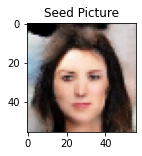

In [ ]:
# Lets play with a beautiful picture
fake_sample = generator_network.predict(np.array([latent_code]))
fake_sample = (fake_sample[0]+1.0)/2.0
plt.figure(figsize=(2,2))
plt.imshow(fake_sample)
plt.title('Seed Picture')
plt.show()

# Corruption with noise masks

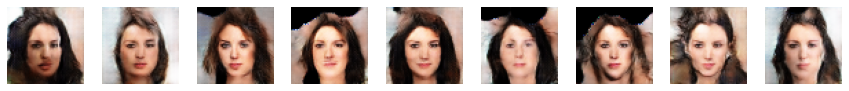

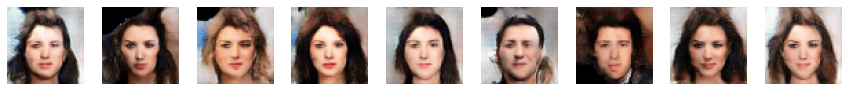

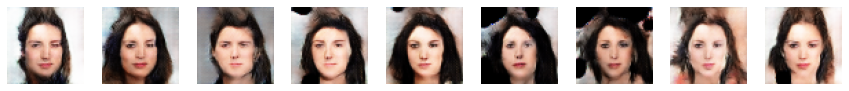

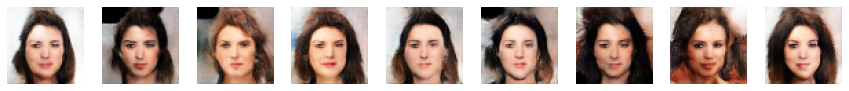

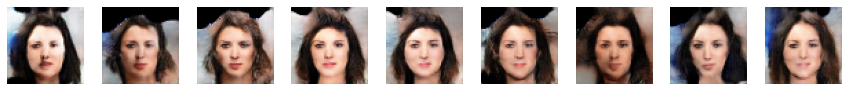

In [ ]:
for iter in range(5):
    plt.figure(figsize=(15,15))
    mask = np.random.randn(20)
    for i in range(9):  
        code = latent_code.copy()
        code[i*10: i*10 + 20] = mask
        fake_sample = generator_network.predict(np.array([code]))
        fake_sample = (fake_sample[0]+1.0)/2.0
        plt.subplot(990 + 1 + i)
        plt.axis('off')
        plt.imshow(fake_sample)
    plt.show()

# Corruption with hanning masks

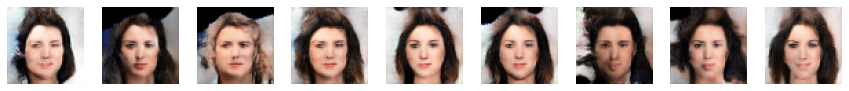

In [ ]:
plt.figure(figsize=(15,15))
mask = np.hanning(20)
for i in range(9):  
    code = latent_code.copy()
    code[i*10: i*10 + 20] = mask
    fake_sample = generator_network.predict(np.array([code]))
    fake_sample = (fake_sample[0]+1.0)/2.0
    plt.subplot(990 + 1 + i)
    plt.axis('off')
    plt.imshow(fake_sample)
plt.show()

# Corruption with zero masks

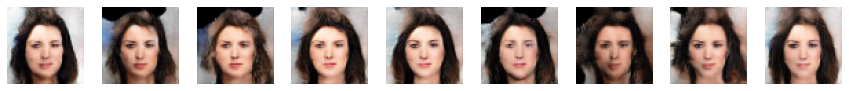

In [ ]:
# Lets play with a beautiful picture

plt.figure(figsize=(15,15))
mask = np.zeros((20))
for i in range(9):  
    code = latent_code.copy()
    code[i*10: i*10 + 20] = mask
    fake_sample = generator_network.predict(np.array([code]))
    fake_sample = (fake_sample[0]+1.0)/2.0
    plt.subplot(990 + 1 + i)
    plt.axis('off')
    plt.imshow(fake_sample)
plt.show()

# Corruption with masks of ones

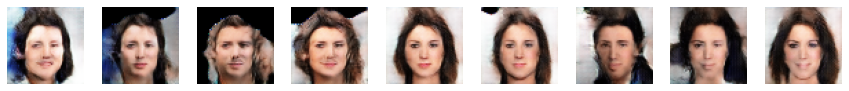

In [ ]:
# Lets play with a beautiful picture
plt.figure(figsize=(15,15))
mask = np.ones((20))
for i in range(9):  
    code = latent_code.copy()
    code[i*10: i*10 + 20] = mask
    fake_sample = generator_network.predict(np.array([code]))
    fake_sample = (fake_sample[0]+1.0)/2.0
    plt.subplot(990 + 1 + i)
    plt.axis('off')
    plt.imshow(fake_sample)
plt.show()